## Kaggle MCI-MRI competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
print "Loading all the necessary python packages"

Loading all the necessary python packages


In [2]:
# Read training data set
data0 = pd.read_csv('data/train.csv')
from IPython.display import display
display(data0)

,SUB_ID,Diagnosis,GENDER,AGE,MMSE_bl,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,...,left_subiculum,left_CA4_DG,left_hippocampal_fissure,right_presubiculum,right_CA1,right_CA2_3,right_fimbria,right_subiculum,right_CA4_DG,right_hippocampal_fissure
0,TRAIN_001,cMCI,Female,65.1,27,8690.1,613.7,10169.9,40775.0,5593.5,...,472.35875,451.31625,69.595125,339.97250,313.68125,8.653450e+05,61.212250,469.00375,460.34125,44.071750
1,TRAIN_002,AD,Male,70.8,26,20312.9,831.2,15566.5,40615.6,5783.5,...,493.75875,495.36125,61.632875,382.70375,322.13250,9.854025e+02,55.604125,509.96625,535.35250,75469.000000
2,TRAIN_003,cMCI,Female,69.3,25,5947.4,616.7,12629.8,33972.7,7364.4,...,371.16125,361.25000,52.905625,276.27750,220.40125,7.359500e+02,37.035375,385.92000,382.09625,52.541375
3,TRAIN_004,cMCI,Male,82.7,28,32833.6,1302.7,14665.5,43951.3,6865.3,...,513.28000,501.09000,37.549875,415.53625,314.41000,9.053200e+02,68.571125,538.35375,508.41625,37.020250
4,TRAIN_005,HC,Female,70.7,30,10164.1,516.7,15598.5,35680.7,6474.9,...,490.67875,461.16000,112.055500,362.30625,358.81750,1.046184e+03,45.542750,565.63375,554.88250,107396.000000
5,TRAIN_006,MCI,Female,62.9,30,8065.8,145.2,13457.1,43442.4,6387.3,...,544115.00000,509.09750,26517.000000,370855.00000,280.52375,1.045828e+03,30.837750,540.52875,548.70125,37.287250
6,TRAIN_007,MCI,Female,72.2,30,9430.6,522.3,16358.3,43173.8,7830.6,...,594.55375,454.14125,43.935375,389.06000,291.95375,1.009880e+03,115.633250,636.04000,555845.00000,54.314875
7,TRAIN_008,cMCI,Female,71.2,28,22050.4,1352.7,16940.0,48357.3,8329.4,...,566.80375,524065.00000,44.956500,376485.00000,366.06000,1.046375e+06,58.705625,561.70250,595.40000,84.660000
8,TRAIN_009,HC,Female,70.4,30,9244.0,328.4,13051.5,44285.4,7511.4,...,576.41625,516.48125,85.551500,450.72625,301.75375,1.009119e+03,64.860000,575.91750,551.58875,70.644625
9,TRAIN_010,cMCI,Male,85.5,26,35460.0,1039.4,13519.7,39463.3,5063.4,...,539.84875,436.23125,39.793125,368.76000,215.07000,7.412988e+02,69.347750,466.58750,402.30000,15.495500


In [3]:
data0.groupby('Diagnosis').count()['SUB_ID']


Diagnosis
AD      60
HC      60
MCI     60
cMCI    60
Name: SUB_ID, dtype: int64

In [4]:
data0.groupby(['Diagnosis','GENDER']).count()['SUB_ID']

Diagnosis  GENDER
AD         Female    31
           Male      29
HC         Female    30
           Male      30
MCI        Female    32
           Male      28
cMCI       Female    25
           Male      35
Name: SUB_ID, dtype: int64

In [27]:
#for k in data0.keys():
#    print k

In [6]:
display(data0.describe())

,AGE,MMSE_bl,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,left_subiculum,left_CA4_DG,left_hippocampal_fissure,right_presubiculum,right_CA1,right_CA2_3,right_fimbria,right_subiculum,right_CA4_DG,right_hippocampal_fissure
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000
mean,73.061250,27.020833,19963.983750,1093.430833,14259.227083,44753.805417,6717.94750,3406.477500,4850.983750,1348.224583,...,68258.237182,54680.214339,5176.983800,52673.901885,34043.203146,1.190271e+05,5454.501647,54534.011036,58541.805661,7169.970288
std,7.026587,2.775337,11024.046988,827.534788,2082.512381,4863.993846,945.66147,564.751297,701.245914,289.839064,...,177213.398430,155566.031123,16075.020960,135149.145748,98594.965068,3.201247e+05,16571.875588,161689.185042,165331.464947,20612.971767
min,55.900000,19.000000,3482.800000,50.700000,7909.500000,32546.900000,4286.50000,804.000000,3116.500000,663.700000,...,279.190000,279.112500,7.733812,171.097500,168.590000,4.625537e+02,0.400980,259.201250,230.533750,9.974500
25%,68.500000,25.000000,10954.825000,482.175000,12921.625000,41579.150000,6073.30000,3041.875000,4412.150000,1167.950000,...,490.659687,426.165313,38.346938,336.963125,276.090312,8.123178e+02,35.501906,478.396563,451.354375,42.952813
50%,72.800000,28.000000,18301.350000,833.400000,14052.450000,44640.000000,6634.05000,3356.600000,4812.900000,1352.100000,...,580.090625,482.445000,53.412312,399.325625,319.163750,9.302869e+02,55.063437,566.690000,517.947500,57.055437
75%,78.500000,29.000000,26069.900000,1484.200000,15585.900000,47986.000000,7307.20000,3712.500000,5220.425000,1535.650000,...,651.497500,565.537813,75.695594,465.991250,367.989375,1.098261e+03,69.460094,645.064687,601.426875,80.866219
max,90.100000,30.000000,69122.900000,4483.200000,21171.900000,59946.700000,9592.10000,5838.600000,7081.100000,3165.200000,...,730025.000000,650475.000000,101641.000000,548935.000000,438535.000000,1.340975e+06,106918.000000,690165.000000,684495.000000,107396.000000


In [23]:
# Feature not to consider
nf = ['Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
     '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem','CSF',  'Left-VentralDC', 'Left-vessel','Left-choroid-plexus',
      'Right-Lateral-Ventricle','Right-Inf-Lat-Vent','Right-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex',
      'Right-VentralDC','Right-vessel','Right-choroid-plexus','5th-Ventricle', 'WM-hypointensities', 
      'Left-WM-hypointensities', 'Right-WM-hypointensities', 'non-WM-hypointensities', 'Left-non-WM-hypointensities',
      'Right-non-WM-hypointensities','Optic-Chiasm','CC_Posterior','CC_Mid_Posterior','CC_Central','CC_Mid_Anterior',
      'CC_Anterior','BrainSegVol','BrainSegVolNotVent','BrainSegVolNotVentSurf','lhCortexVol','rhCortexVol','CortexVol',
      'lhCorticalWhiteMatterVol','rhCorticalWhiteMatterVol','CorticalWhiteMatterVol','SubCortGrayVol','TotalGrayVol',
      'SupraTentorialVol','SupraTentorialVolNotVent','SupraTentorialVolNotVentVox','MaskVol','BrainSegVol-to-eTIV', 
      'MaskVol-to-eTIV','lhSurfaceHoles','rhSurfaceHoles','SurfaceHoles','EstimatedTotalIntraCranialVol', 
      'lh_MeanThickness_thickness','rh_MeanThickness_thickness','lh_WhiteSurfArea_area', 'rh_WhiteSurfArea_area']

In [31]:
#nf1 
#nf2 = list(data0.keys()[data0.keys().str.contains('thicknessstd$|meancurv$')])
nf2 = list(data0.keys()[data0.keys().str.contains('thicknessstd$|meancurv$')])

#nf.extend(nf2)
for line in nf2:
    nf.append(line)
nf = list(set(nf))
print len(nf)

188


In [37]:
data1 = data0.drop(nf, 1)
for k in data1.keys():
    print k

SUB_ID
Diagnosis
GENDER
AGE
MMSE_bl
Left-Thalamus-Proper
Left-Caudate
Left-Putamen
Left-Pallidum
Left-Hippocampus
Left-Amygdala
Left-Accumbens-area
Right-Thalamus-Proper
Right-Caudate
Right-Putamen
Right-Pallidum
Right-Hippocampus
Right-Amygdala
Right-Accumbens-area
lh_bankssts_thickness
lh_caudalanteriorcingulate_thickness
lh_caudalmiddlefrontal_thickness
lh_cuneus_thickness
lh_entorhinal_thickness
lh_fusiform_thickness
lh_inferiorparietal_thickness
lh_inferiortemporal_thickness
lh_isthmuscingulate_thickness
lh_lateraloccipital_thickness
lh_lateralorbitofrontal_thickness
lh_lingual_thickness
lh_medialorbitofrontal_thickness
lh_middletemporal_thickness
lh_parahippocampal_thickness
lh_paracentral_thickness
lh_parsopercularis_thickness
lh_parsorbitalis_thickness
lh_parstriangularis_thickness
lh_pericalcarine_thickness
lh_postcentral_thickness
lh_posteriorcingulate_thickness
lh_precentral_thickness
lh_precuneus_thickness
lh_rostralanteriorcingulate_thickness
lh_rostralmiddlefrontal_thickn

In [42]:
options = {'AD' : 0, 'HC' : 1, 'MCI' : 2, 'cMCI' : 3 }
y=[]
for i in data1['Diagnosis'] :
    y.append(options[i])
data2 = data1.drop(['SUB_ID', 'Diagnosis', 'GENDER', 'AGE', 'MMSE_bl'],1)
display(data2)

,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,...,left_subiculum,left_CA4_DG,left_hippocampal_fissure,right_presubiculum,right_CA1,right_CA2_3,right_fimbria,right_subiculum,right_CA4_DG,right_hippocampal_fissure
0,5593.5,3028.4,4802.2,1332.4,2907.9,1249.5,395.8,5692.8,3232.7,5171.5,...,472.35875,451.31625,69.595125,339.97250,313.68125,8.653450e+05,61.212250,469.00375,460.34125,44.071750
1,5783.5,3061.9,5413.0,1270.4,3074.9,1553.1,417.5,5494.2,2902.9,5458.4,...,493.75875,495.36125,61.632875,382.70375,322.13250,9.854025e+02,55.604125,509.96625,535.35250,75469.000000
2,7364.4,3502.4,3412.7,1063.9,2370.2,1404.7,420.3,5635.8,3372.7,3598.5,...,371.16125,361.25000,52.905625,276.27750,220.40125,7.359500e+02,37.035375,385.92000,382.09625,52.541375
3,6865.3,3740.5,4875.2,1417.0,3121.7,1520.7,273.1,5838.9,3872.4,4465.6,...,513.28000,501.09000,37.549875,415.53625,314.41000,9.053200e+02,68.571125,538.35375,508.41625,37.020250
4,6474.9,3309.4,5453.2,1188.6,3294.2,1652.2,483.2,6152.6,3703.7,5694.8,...,490.67875,461.16000,112.055500,362.30625,358.81750,1.046184e+03,45.542750,565.63375,554.88250,107396.000000
5,6387.3,3466.8,4945.4,1219.8,4007.5,1617.9,589.3,5820.1,3667.4,5792.1,...,544115.00000,509.09750,26517.000000,370855.00000,280.52375,1.045828e+03,30.837750,540.52875,548.70125,37.287250
6,7830.6,3387.7,3304.6,866.1,3756.5,1378.8,270.2,5916.1,3436.7,3933.2,...,594.55375,454.14125,43.935375,389.06000,291.95375,1.009880e+03,115.633250,636.04000,555845.00000,54.314875
7,8329.4,4018.8,5188.3,1556.1,3535.1,1518.6,360.5,7496.8,3818.4,4566.4,...,566.80375,524065.00000,44.956500,376485.00000,366.06000,1.046375e+06,58.705625,561.70250,595.40000,84.660000
8,7511.4,3266.9,4064.9,1413.0,3911.6,2063.4,68.6,5872.7,3416.4,4263.4,...,576.41625,516.48125,85.551500,450.72625,301.75375,1.009119e+03,64.860000,575.91750,551.58875,70.644625
9,5063.4,4040.2,4164.2,1507.4,2880.5,1025.8,418.8,5266.9,3866.4,3942.8,...,539.84875,436.23125,39.793125,368.76000,215.07000,7.412988e+02,69.347750,466.58750,402.30000,15.495500


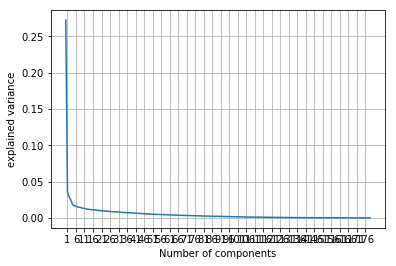

(180, 238)

In [99]:
%matplotlib inline
from sklearn.model_selection import train_test_split
X_train0, X_test0, Y_train0, Y_test0 = train_test_split(data2,y, test_size = 0.25, random_state = 12345)
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train0)
X_train0 = scaler.fit_transform(X_train0)
X_test0 = scaler.fit_transform(X_test0)
tdata = X_train0 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(tdata)
pca_score = pca.explained_variance_ratio_
pca_score
plt.plot(pca_score)
plt.ylabel('explained variance')
plt.xlabel('Number of components')
plt.xticks(np.arange(1, len(pca_score)+ 1, 5.0))
plt.grid(True)
plt.show()
tdata.shape

In [101]:
# Final PCA
finalpca = PCA(n_components = 5, random_state = 12345)
finalpca.fit(X_train0)
X_train0  = finalpca.transform(X_train0)
X_test0   = finalpca.transform(X_test0)
X_test0[:10]

array([[  8.06401348e-01,  -8.86720586e-01,  -3.11626059e+00,
         -2.23853513e+00,  -2.39688405e-01],
       [ -1.67370661e+01,   2.02074030e+00,   1.42842957e+00,
          7.10119332e-02,   2.02829207e+00],
       [  7.10311329e+00,  -3.26730449e+00,   7.41564420e-01,
          2.58855474e+00,   1.11559039e-02],
       [ -9.01308325e+00,   2.91793081e+00,   1.37114757e+00,
         -1.32048559e+00,  -9.67121104e-01],
       [  7.57140982e+00,  -3.14521342e+00,   5.97295004e-01,
          3.36381219e+00,   1.59957937e-01],
       [  1.97649318e+00,  -1.78678369e+00,  -2.48522414e-01,
          8.16144034e-01,   7.34456442e-02],
       [ -3.32534486e+00,   1.29666686e+00,  -1.36185411e+00,
          4.30523014e+00,   1.44073795e-01],
       [ -1.16850326e+01,  -2.63860849e+00,   7.12184111e-01,
          1.14351287e+00,   2.85907866e-01],
       [ -1.53981230e+00,  -2.64779693e+00,  -5.17889996e-02,
          2.61174984e+00,  -3.25639491e-01],
       [  9.47637106e+00,   2.6607001

In [103]:
print "Number of data points in training set : ", X_train0.shape[0]
print "Number of data points in validation set : ", X_test0.shape[0]


Number of data points in training set :  180
Number of data points in validation set :  60
